In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Содержание

* [1 Исследование входных данных](#chapter1)
    * [1.1 Датасет *Predicting Heart Disease Risk Using Clinical Variables*](#section_1_1)
        * [1.1.1 Описание переменных](#sub_section_1_1_1)
        * [1.1.2 Обзор датасета](#sub_section_1_1_2)
    * [1.2 Датасет *Cleveland Clinic Heart Disease Dataset*](#section_1_2)
        * [1.2.1 Описание переменных](#sub_section_1_2_1)
        * [1.2.2 Обзор датасета](#sub_section_1_2_2)
* [2 Определение функций моделирования пропусков](#chapter2)
    * [2.1 MCAR](#section_2_1)
    * [2.2 MAR](#section_2_2)
    * [2.3 MNAR](#section_2_3)
* [3 Определение функций для импутации](#chapter3)
    * [3.1 Создание 2 тестовых датасетов (Потом уберу)](#section_3_1)
    * [3.2 Импутация средним](#section_3_2)
    * [3.3 Линейная регрессия](#section_3_3)
    * [3.4 k-ближайших соседей (kNN)](#section_3_4)
    * [3.5 Решающие деревья для классификации](#section_3_5)
    * [3.6 Решающие деревья для регрессии](#section_3_6)
* [4 Создание набора датасетов](#chapter4)
    * [4.1 Датасет *Predicting Heart Disease Risk Using Clinical Variables*](#section_4_1)
    * [4.2 Датасет *Cleveland Clinic Heart Disease Dataset*](#section_4_2)
* [5 Применение методов](#chapter5)
    * [5.1 Определение функции для применения методов](#section_5_1)
    * [5.2 Датасет *Predicting Heart Disease Risk Using Clinical Variables*](#section_5_2)
    * [5.3 Датасет *Cleveland Clinic Heart Disease Dataset*](#section_5_3)
* [6 Сравнение результатов](#chapter6)
    * [6.1 Создание матриц метрик и определение функции поиска лучших показателей](#section_6_1)
    * [6.2 Датасет *Predicting Heart Disease Risk Using Clinical Variables*](#section_6_2)
    * [6.3 Датасет *Cleveland Clinic Heart Disease Dataset*](#section_6_3)
* [7 Выводы](#chapter7)

# 1 Исследование исходных данных <a class="anchor" id="chapter1"></a>

## 1.1 Датасет *Predicting Heart Disease Risk Using Clinical Variables* <a class="anchor" id="section_1_1"></a>

### 1.1.1 Описание переменных  <a class="anchor" id="sub_section_1_1_1"></a>
|Column name            |Description                                                      |Type             |
|-----------------------|-----------------------------------------------------------------|-----------------|
|Age                    |The age of the patient.                                          |Numeric          |
|Sex                    |The gender of the patient.                                       |Categorical (Bin)|
|Chest pain type        |The type of chest pain experienced by the patient.               |Categorical      |
|BP                     |The blood pressure level of the patient.                         |Numeric          |
|Cholesterol            |The cholesterol level of the patient.                            |Numeric          |
|FBS over 120           |The fasting blood sugar test results over 120 mg/dl.             |Categorical (Bin)|
|EKG results            |The electrocardiogram results of the patient.                    |Categorical      |
|Max HR                 |The maximum heart rate levels achieved during exercise testing.  |Numeric          |
|Exercise angina        |The angina experienced during exercise testing.                  |Categorical (Bin)|
|ST depression          |The ST depression on an Electrocardiogram.                       |Numeric          |
|Slope of ST            |The slope of ST segment electrocardiogram readings.              |Categorical      |
|Number of vessels fluro|The amount vessels seen in Fluoroscopy images.                   |Numeric          |
|Thallium               |The Thallium Stress test findings.                               |Categorical      |
|Heart Disease          |Whether or not the patient has been diagnosed with Heart Disease.|Categorical (Bin)|

### 1.1.2 Обзор датасета <a class="anchor" id="sub_section_1_1_2"></a>

In [2]:
phd_data = pd.read_csv('../../ВКР/Datasets/Heart_Disease_Prediction.csv', index_col='index')
phd_data.head(6)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
index,,,,,,,,,,,,,,
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence


In [3]:
phd_data.replace({'Presence': 1, 'Absence': 0}, inplace=True)

In [4]:
phd_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m

In [5]:
phd_data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [6]:
phd_data.shape

(270, 14)

<AxesSubplot:>

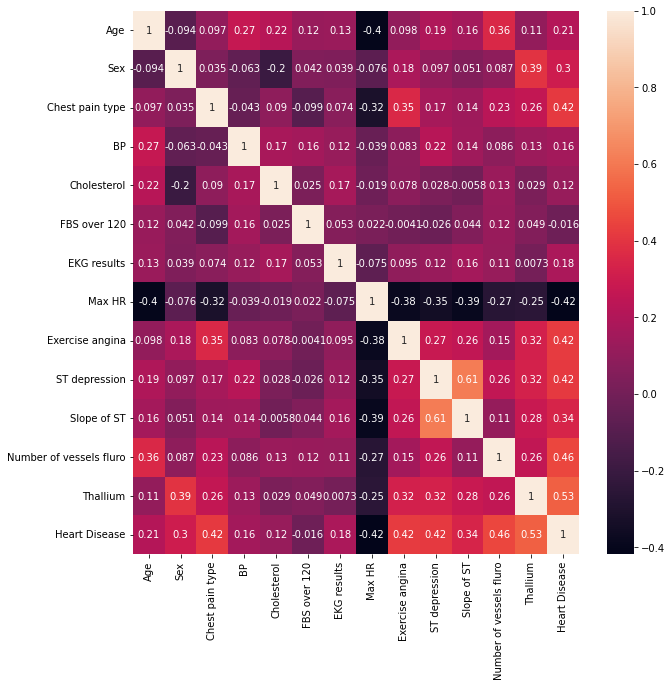

In [7]:
plt.figure(figsize=(10, 10))
sns.heatmap(phd_data.corr(), annot=True)

In [8]:
phd_data.corr().sum()

Age                        2.471848
Sex                        1.784761
Chest pain type            2.400219
BP                         2.394075
Cholesterol                1.829586
FBS over 120               1.495045
EKG results                2.183973
Max HR                    -1.959862
Exercise angina            2.927466
ST depression              3.336540
Slope of ST                2.898190
Number of vessels fluro    3.082684
Thallium                   3.433992
Heart Disease              4.103383
dtype: float64

In [9]:
phd_data['Heart Disease'].describe()

count    270.000000
mean       0.444444
std        0.497827
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Heart Disease, dtype: float64

In [10]:
len(phd_data[phd_data['Heart Disease'] == 1]) / 270 * 100

44.44444444444444

## 1.2 Датасет *Cleveland Clinic Heart Disease Dataset* <a class="anchor" id="section_1_2"></a>

### 1.2.1 Описание переменных <a class="anchor" id="sub_section_1_2_1"></a>
|Column name|Description                                                                                              |Type|
|-----------|--------------------------------------------------------------------------------------------------------------|-----------------|
|age        |age in years                                                                                                  |Numeric          |
|sex        |sex (1 = male; 0 = female)                                                                                    |Categorical (Bin)|
|cp         |chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)                 |Categorical      |
|trestbps   |resting blood pressure (in mm Hg on admission to the hospital)                                                |Numeric          |
|chol       |serum cholestoral in mg/dl                                                                                    |Numeric          |
|fbs        |fasting blood sugar > 120 mg/dl (1 = true; 0 = false)                                                         |Categorical (Bin)|
|restecg    |resting electrocardiographic results (0: normal; 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)    |Categorical      |
|thalach    |maximum heart rate achieved                                                                                   |Numeric          |
|exang      |exercise induced angina (1 = yes; 0 = no)                                                                     |Categorical (Bin)|
|oldpeak    |ST depression induced by exercise relative to rest                                                            |Numeric          |
|slope      |the slope of the peak exercise ST segment (1: upsloping 2: flat 3: downsloping)                               |Categorical      |
|ca         |number of major vessels (0-3) colored by flourosopy (for calcification of vessels)                            |Categorical      |
|thal       |results of nuclear stress test (3 = normal; 6 = fixed defect; 7 = reversable defect)                          |Categorical      |
|num        |target variable representing diagnosis of heart disease (angiographic disease status) in any major vessel (0: < 50% diameter narrowing; 1-4: > 50% diameter narrowing)                                                                     |Categorical    |

### 1.2.2 Обзор датасета <a class="anchor" id="sub_section_1_2_2"></a>

In [11]:
cchd_data = pd.read_csv('../../ВКР/Datasets/processed_cleveland.csv')
cchd_data.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


In [12]:
cchd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [13]:
cchd_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [14]:
cchd_data.shape

(303, 14)

C:\Users\ngumbk\AppData\Local\Temp\ipykernel_27392\1231288863.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cchd_data.corr(), annot=True)


<AxesSubplot:>

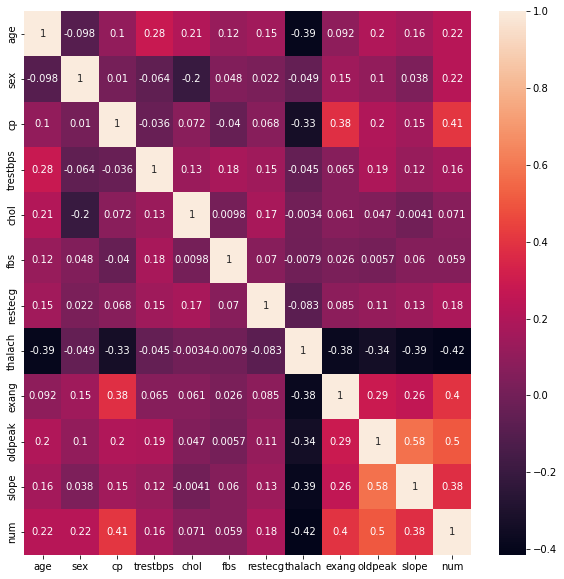

In [15]:
plt.figure(figsize=(10, 10))
sns.heatmap(cchd_data.corr(), annot=True)

In [16]:
cchd_data.corr().sum()

C:\Users\ngumbk\AppData\Local\Temp\ipykernel_27392\3743603929.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cchd_data.corr().sum()


age         2.054174
sex         1.179393
cp          1.989035
trestbps    2.120152
chol        1.563648
fbs         1.523802
restecg     2.058440
thalach    -1.438748
exang       2.423452
oldpeak     2.890636
slope       2.486153
num         3.190008
dtype: float64

In [17]:
len(cchd_data[cchd_data['num'] == 0])

164

In [18]:
164/303 * 100

54.12541254125413

# 2 Определение функций моделирования пропусков <a class="anchor" id="chapter2"></a>

## 2.1 MCAR <a class="anchor" id="section_2_1"></a>

In [19]:
def replace_random_elements(array, n):
    flat_array = array.flatten()  # делаем одномерный массив из двумерного
    indices = np.random.choice(flat_array.size, n, replace=False)  # выбираем случайные индексы
    flat_array[indices] = 1  # заменяем выбранные элементы на 1
    return flat_array.reshape(array.shape)  # возвращаем двумерный массив

In [20]:
def make_mcar(dataset, area='All', miss_percent=5):
    '''
    dataset - исходный набор данных в виде pandas dataframe
    area='All' - аргумент, принимающий наименование одного из столбцов dataset в виде строки. В случае, если не указан, пропуски моделируются во всем датасете
    miss_percent=5 - процент моделируемых пропусков в указанной области в виде числа
    '''
    dataset = dataset.copy()
    if area == 'All':
        elements_number = dataset.shape[0] * dataset.shape[1]
        missing_elements_number = round(miss_percent * elements_number / 100)
        real_miss_percent = missing_elements_number / elements_number * 100 # может не равняться miss_percent, т.к. нужно целое кол-во элементов
        
        data_missing_indicator = np.zeros(dataset.shape) # массив индикаторов размером dataset'a
        data_missing_indicator = replace_random_elements(data_missing_indicator, missing_elements_number)
        
        dataset[data_missing_indicator == 1] = np.nan        
    else:
        elements_number = dataset.shape[0]
        missing_elements_number = round(miss_percent * elements_number / 100)
        real_miss_percent = missing_elements_number / elements_number * 100 # может не равняться miss_percent, т.к. нужно целое кол-во элементов
        
        data_missing_indicator = np.zeros(dataset.shape[0]) # массив индикаторов размером dataset'a
        data_missing_indicator = replace_random_elements(data_missing_indicator, missing_elements_number)
        
        dataset.loc[data_missing_indicator == 1, area] = np.nan
        
    print( "'" + area + "'", str(miss_percent) + '%', str(round(real_miss_percent, 3)) + '%', sep='; ', end='.\n')    
    
    return dataset

In [21]:
# Проверка
make_mcar(phd_data, area='All', miss_percent=40)

'All'; 40%; 40.0%.


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
index,,,,,,,,,,,,,,
0,70.0,1.0,4.0,130.0,NaN,0.0,2.0,109.0,NaN,2.4,2.0,3.0,NaN,1.0
1,NaN,NaN,NaN,115.0,564.0,NaN,NaN,160.0,0.0,NaN,NaN,0.0,7.0,NaN
2,57.0,NaN,2.0,124.0,NaN,0.0,0.0,141.0,0.0,NaN,1.0,NaN,7.0,NaN
3,64.0,NaN,NaN,128.0,NaN,NaN,0.0,NaN,NaN,0.2,2.0,1.0,7.0,0.0
4,74.0,NaN,2.0,120.0,269.0,0.0,2.0,NaN,1.0,0.2,NaN,1.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,NaN,3.0,NaN,199.0,NaN,0.0,NaN,NaN,0.5,1.0,NaN,NaN,0.0
266,NaN,NaN,NaN,NaN,263.0,NaN,0.0,173.0,NaN,0.0,NaN,0.0,NaN,NaN
267,NaN,0.0,2.0,NaN,294.0,0.0,2.0,153.0,0.0,NaN,2.0,NaN,NaN,0.0


## 2.2 MAR <a class="anchor" id="section_2_2"></a>

In [22]:
def add_missing(x, area, p_miss):
    if pd.isna(x[area]):
        return x[area]
    else:
        return np.random.choice([x[area], np.nan], p=[1-p_miss[x.name], p_miss[x.name]])

In [23]:
def make_mar(dataset, area, area_dependent, ascending=False, miss_parameter=5):
    '''
    dataset - исходный набор данных в виде pandas dataframe
    area - аргумент, принимающий наименование одного из столбцов dataset в виде строки, в данном столбце будут созданы пропуски
    area_dependent - аргумент, принимающий наименование одного из столбцов dataset в виде строки, от значений в этом столбце будут зависеть вероятности пропусков в столбце area
    ascending=False - если False, то чем больше значение элемента, тем больше вероятность пропуска
    miss_parameter=5 - параметр, применяемый при составлении вектора индикаторов пропусков
    '''
    dataset = dataset.copy()
    
    elements_number = dataset.shape[0]
    data_missing_indicator = np.zeros(dataset.shape[0])
    
    if ascending:
        p_miss = dataset[area_dependent].apply(lambda x: (1 - x / dataset[area_dependent].max()) * miss_parameter / 100)
    else:
        p_miss = dataset[area_dependent].apply(lambda x: x / dataset[area_dependent].max() * miss_parameter / 100)
    
    dataset[area] = dataset.apply(lambda x: add_missing(x, area, p_miss), axis=1)
    
    real_miss_percent = len(dataset[dataset[area].isna()]) / elements_number * 100
    print( "'" + area + "'", "'" + area_dependent + "'", miss_parameter, str(round(real_miss_percent, 3)) + '%', sep='; ', end='.\n')    
 
    return dataset

In [24]:
# Проверка
make_mar(phd_data, area='Cholesterol', area_dependent='Chest pain type', ascending=False, miss_parameter=75)

'Cholesterol'; 'Chest pain type'; 75; 57.778%.


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
index,,,,,,,,,,,,,,
0,70,1,4,130,NaN,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,NaN,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261.0,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,NaN,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269.0,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,NaN,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263.0,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,NaN,0,2,153,0,1.3,2,0,3,0


## 2.3 MNAR <a class="anchor" id="section_2_3"></a>

In [25]:
def make_mnar(dataset, area, ascending=False, miss_parameter=5):
    '''
    dataset - исходный набор данных в виде pandas dataframe
    area - аргумент, принимающий наименование одного из столбцов dataset в виде строки
    ascending=False - если False, то чем больше значение элемента, тем больше вероятность пропуска
    miss_parameter=5 - параметр, применяемый при составлении вектора индикаторов пропусков
    '''
    dataset = dataset.copy()
    
    elements_number = dataset.shape[0]
    data_missing_indicator = np.zeros(dataset.shape[0])
    
    if ascending:
        p_miss = dataset[area].apply(lambda x: (1 - x / dataset[area].max()) * miss_parameter / 100)
    else:
        p_miss = dataset[area].apply(lambda x: x / dataset[area].max() * miss_parameter / 100)
    
    dataset[area] = dataset.apply(lambda x: add_missing(x, area, p_miss), axis=1)
    
    real_miss_percent = len(dataset[dataset[area].isna()]) / elements_number * 100
    print( "'" + area + "'", miss_parameter, str(round(real_miss_percent, 3)) + '%', sep='; ', end='.\n')    
    return dataset

In [26]:
# Проверка
make_mnar(phd_data, area='Chest pain type', ascending=False, miss_parameter=75)

'Chest pain type'; 75; 60.37%.


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
index,,,,,,,,,,,,,,
0,70,1,4.0,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,NaN,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,NaN,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,NaN,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2.0,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,NaN,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2.0,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,NaN,140,294,0,2,153,0,1.3,2,0,3,0


# 3 Определение функций для импутации <a class="anchor" id="chapter3"></a>

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 3.1 Создание 2 тестовых датасетов (потом уберу) <a class="anchor" id="section_3_1"></a>

In [28]:
phd_mar_num20_test = make_mar(phd_data, area='Max HR', area_dependent='Age', miss_parameter=20)
# вектор истинных значений
num_test_mask_null = phd_mar_num20_test['Max HR'].isnull()
num_true = np.array(phd_data.loc[num_test_mask_null == True, 'Max HR']).reshape(-1, 1) # берем только те строки, в которых в column пропуск
print('num_true.shape:', num_true.shape, end='\n\n')


phd_mar_cat20_test = make_mar(phd_data, area='Heart Disease', area_dependent='Max HR', miss_parameter=20)
# вектор истинных значений
cat_test_mask_null = phd_mar_cat20_test['Heart Disease'].isnull()
cat_true = np.array(phd_data.loc[cat_test_mask_null == True, 'Heart Disease']).reshape(-1, 1) # берем только те строки, в которых в column пропуск
print('cat_true.shape:', cat_true.shape)

'Max HR'; 'Age'; 20; 15.556%.
num_true.shape: (42, 1)

'Heart Disease'; 'Max HR'; 20; 12.963%.
cat_true.shape: (35, 1)


## 3.2 Импутация средним <a class="anchor" id="section_3_2"></a>

In [29]:
def impute_average(dataset, column, mode='median', standard_deviation=False):
    '''
    dataset - исходный набор данных в виде pandas dataframe
    column - столбец, подлежащий восстановлению
    mode='median' - значение, которым восстанавливается столбец, также есть варианты mean, mode
    standard_deviation=False - добавление случайных чисел в пределах стандартного отклонения в массив импутируемых значений
    '''
    dataset = dataset.copy()
    dataset_col = dataset.loc[:, column]
    if mode == 'median':
        imputed_value = dataset_col.median()
    elif mode == 'mean':
        imputed_value = round(dataset_col.mean(), 1)
    elif mode == 'mode':
        imputed_value = dataset_col.mode().iloc[0]
    print('Значение для импутации:', imputed_value)
    
    if not standard_deviation:
        dataset[column] = dataset[column].fillna(value=imputed_value)
    else:
        std = dataset[column].std()
        # rand(-std, std)
    return dataset

In [30]:
phd_mar_num20_test.loc[:, 'Max HR'].describe()

count    228.000000
mean     149.745614
std       23.435472
min       71.000000
25%      133.000000
50%      154.000000
75%      168.000000
max      202.000000
Name: Max HR, dtype: float64

In [31]:
# Восстанавливаем численную переменную медианой
phd_mar_num20_test_imputed = impute_average(phd_mar_num20_test, 'Max HR', mode='median')

Значение для импутации: 154.0


In [32]:
# предикт медианой
test_median = phd_mar_num20_test.loc[:, 'Max HR'].median()
median_pred = np.array([test_median for i in range(phd_mar_num20_test['Max HR'].isna().sum())]).reshape(-1, 1) 
median_pred.shape

(42, 1)

In [33]:
# Восстанавливаем категориальную переменную модой
phd_mar_cat20_test_imputed = impute_average(phd_mar_cat20_test, 'Heart Disease', mode='mode')

Значение для импутации: 0.0


In [34]:
# предикт модой
test_mode = phd_mar_cat20_test.loc[:, 'Heart Disease'].median()
mode_pred = np.array([test_mode for i in range(phd_mar_cat20_test['Heart Disease'].isna().sum())]).reshape(-1, 1) 
mode_pred.shape

(35, 1)

<AxesSubplot:xlabel='Max HR', ylabel='count'>

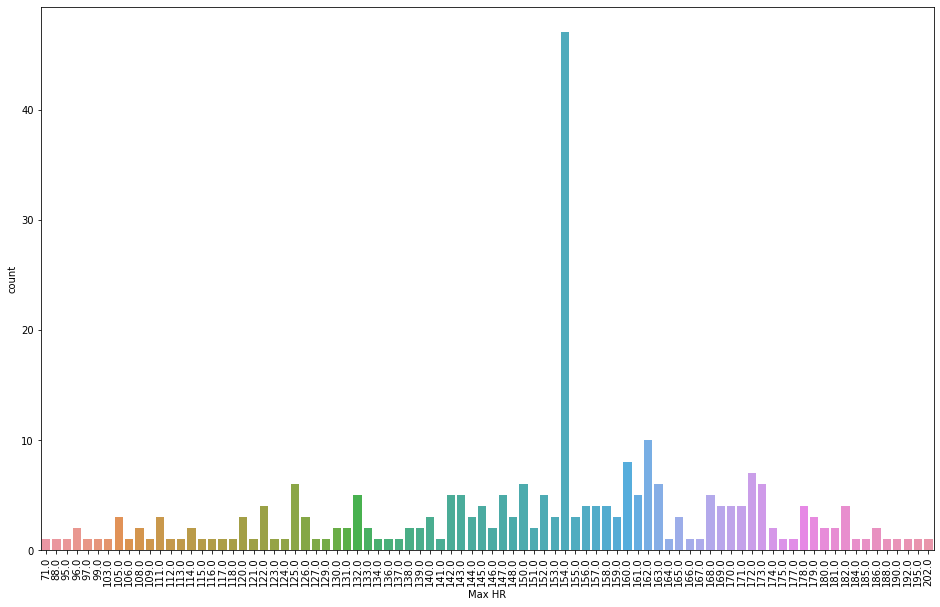

In [35]:
# поворачиваем лейблы оси x на 90 градусов
plt.figure(figsize=(16, 10))
plt.xticks(rotation=90)
sns.countplot(data=phd_mar_num20_test_imputed, x='Max HR')

## 3.3 Линейная регрессия <a class="anchor" id="section_3_3"></a>

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Для обучения и тестирования модели лин. регрессии берем исключительно строки без пропуска в целевой переменной.  
Несмотря на то, что исходный датасет не содержит пропусков, и нам известны все значения переменных, в "боевых" условиях у исследователя такой привелегии нет. 

In [37]:
def impute_linreg(dataset, column, excluded_columns=[]):
    '''
    dataset - исходный набор данных в виде pandas dataframe
    column - столбец, подлежащий восстановлению
    excluded_columns=[] - список колонок, не используемых в обучении
    '''
    dataset = dataset.copy()
    mask_notnull = dataset[column].notnull()
    full_data = dataset.loc[mask_notnull == True, :] # берем только те строки, в которых в column нет пропуска
    y = np.array(full_data.loc[:, column]).reshape(-1, 1)
    
    excluded_columns.append(column)
    x = np.array(full_data.loc[:, ~full_data.columns.isin(excluded_columns)])
    
    missing_data = dataset.loc[mask_notnull == False, :]
    x_pred = np.array(missing_data.loc[:, ~full_data.columns.isin(excluded_columns)])
    
    scaler = StandardScaler()
    
    x = scaler.fit_transform(x)
    x_pred = scaler.fit_transform(x_pred)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
        
    reg = LinearRegression()
    reg.fit(x_train, y_train)
    print('Показатели модели:', reg.coef_, reg.intercept_, sep='\n', end='\n\n')
    print(reg.score(x_train, y_train), reg.score(x_test, y_test), sep='\n')
    return reg.predict(x_pred)

In [38]:
# предикт регрессией
reg_pred = impute_linreg(phd_mar_num20_test, 'Max HR')
reg_pred.shape

Показатели модели:
[[-6.3464381   0.35660636 -2.70177323  2.76363139  1.76971772 -0.39254735
   2.45543023 -4.72325816 -1.08696936 -5.99571346 -0.52723421  1.38360704
  -3.72115141]]
[149.77457034]

0.3971369917930776
0.43083395862239926


(42, 1)

## 3.4 k-ближайших соседей (kNN) <a class="anchor" id="section_3_4"></a>

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [40]:
def impute_knn(dataset, column, excluded_columns=[]):
    '''
    dataset - исходный набор данных в виде pandas dataframe
    column - столбец, подлежащий восстановлению
    excluded_columns=[] - список колонок, не используемых в обучении
    '''
    dataset = dataset.copy() # копируем датасет чтобы не вносить изменения по ссылке
    mask_notnull = dataset[column].notnull() # создаем маску, с True на тех позициях, где в dataset[column] нет пропуска
    full_data = dataset.loc[mask_notnull == True, :] # применяем маску чтобы получить срез датасета для обучения и теста
    y = np.array(full_data.loc[:, column]).reshape(-1, 1) # берем таргеты из датасета для обучения
    
    excluded_columns.append(column) # добавляем колонку таргетов в список исключенных колонок
    x = np.array(full_data.loc[:, ~full_data.columns.isin(excluded_columns)]) # составляем массив данных для обучения
    
    missing_data = dataset.loc[mask_notnull == False, :] # срез датасета для восстановления пропусков в dataset
    x_pred = np.array(missing_data.loc[:, ~full_data.columns.isin(excluded_columns)]) # массив признаков для подстановки в обученную модель
    
    # Нормализация X
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    x_pred = scaler.fit_transform(x_pred)
    
    # Деление выборки на обучающую и тестовую
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
    
    knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto',
                                 leaf_size=30, p=2, metric='minkowski', n_jobs=-1)
    
    # "Обучение" модели
    knn_model.fit(x_train, y_train.ravel())
    
    print(knn_model.score(x_train, y_train), knn_model.score(x_test, y_test), sep='\n')
    
    return knn_model.predict(x_pred)

In [41]:
knn_pred = impute_knn(phd_mar_cat20_test, 'Heart Disease')
knn_pred.shape

0.8693181818181818
0.8813559322033898


(35,)

## 3.5 Решающие деревья для классификации <a class="anchor" id="section_3_5"></a>

In [42]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report

In [43]:
def impute_catboost_cat(dataset, column, excluded_columns=[], catboost_params={}, verbose=100):
    '''
    dataset - исходный набор данных в виде pandas dataframe
    column - столбец, подлежащий восстановлению
    excluded_columns=[] - список колонок, не используемых в обучении
    catboost_params={} - список параметров catboost
    verbose=100 
    '''
    
    dataset = dataset.copy()
    mask_notnull = dataset[column].notnull()
    full_data = dataset.loc[mask_notnull == True, :] # берем только те строки, в которых в column нет пропуска
    y = np.array(full_data.loc[:, column]).reshape(-1, 1)
    
    excluded_columns.append(column)
    x = np.array(full_data.loc[:, ~full_data.columns.isin(excluded_columns)])
    
    missing_data = dataset.loc[mask_notnull == False, :]
    x_pred = np.array(missing_data.loc[:, ~full_data.columns.isin(excluded_columns)])
    
    scaler = StandardScaler()
    
    x = scaler.fit_transform(x)
    x_pred = scaler.fit_transform(x_pred)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
    
    learn_pool = Pool(
        x_train, 
        y_train
    )
    test_pool = Pool(
        x_test, 
        y_test
    )
 
    catboost_default_params = {
        'iterations': 1000,
        'learning_rate': 0.01,
        'eval_metric': 'TotalF1',
        'leaf_estimation_method': 'Gradient',
        'bootstrap_type': 'Bernoulli',
        'objective': 'CrossEntropy',
    }
 
    catboost_default_params.update(catboost_params)
 
    catboost = CatBoostClassifier(**catboost_default_params)
    catboost.fit(learn_pool, eval_set=test_pool, verbose=verbose)
 
    return catboost.predict(x_pred)

In [44]:
catboost_cat_pred = impute_catboost_cat(phd_mar_cat20_test, 'Heart Disease')
catboost_cat_pred.shape

0:	learn: 0.7469476	test: 0.7667882	best: 0.7667882 (0)	total: 140ms	remaining: 2m 19s
100:	learn: 0.9430634	test: 0.8817068	best: 0.9149495 (17)	total: 560ms	remaining: 4.99s
200:	learn: 0.9715789	test: 0.8817068	best: 0.9149495 (17)	total: 920ms	remaining: 3.66s
300:	learn: 1.0000000	test: 0.8817068	best: 0.9149495 (17)	total: 1.29s	remaining: 2.99s
400:	learn: 1.0000000	test: 0.8651246	best: 0.9149495 (17)	total: 1.64s	remaining: 2.45s
500:	learn: 1.0000000	test: 0.8318913	best: 0.9149495 (17)	total: 2.01s	remaining: 2.01s
600:	learn: 1.0000000	test: 0.8151829	best: 0.9149495 (17)	total: 2.39s	remaining: 1.59s
700:	learn: 1.0000000	test: 0.8151829	best: 0.9149495 (17)	total: 2.76s	remaining: 1.18s
800:	learn: 1.0000000	test: 0.8151829	best: 0.9149495 (17)	total: 3.15s	remaining: 782ms
900:	learn: 1.0000000	test: 0.7982695	best: 0.9149495 (17)	total: 3.5s	remaining: 385ms
999:	learn: 1.0000000	test: 0.7982695	best: 0.9149495 (17)	total: 3.87s	remaining: 0us

bestTest = 0.9149494878
b

(35,)

## 3.6 Решающие деревья для регрессии <a class="anchor" id="section_3_6"></a>

In [45]:
from catboost import CatBoostRegressor

In [46]:
def impute_catboost_num(dataset, column, excluded_columns=[], catboost_params={}, verbose=100):
    '''
    dataset - исходный набор данных в виде pandas dataframe
    column - столбец, подлежащий восстановлению
    excluded_columns=[] - список колонок, не используемых в обучении
    catboost_params={} - список параметров catboost
    verbose=100 
    '''
    
    dataset = dataset.copy()
    mask_notnull = dataset[column].notnull()
    full_data = dataset.loc[mask_notnull == True, :] # берем только те строки, в которых в column нет пропуска
    y = np.array(full_data.loc[:, column]).reshape(-1, 1)
    
    excluded_columns.append(column)
    x = np.array(full_data.loc[:, ~full_data.columns.isin(excluded_columns)])
    
    missing_data = dataset.loc[mask_notnull == False, :]
    x_pred = np.array(missing_data.loc[:, ~full_data.columns.isin(excluded_columns)])
    
    scaler = StandardScaler()
    
    x = scaler.fit_transform(x)
    x_pred = scaler.fit_transform(x_pred)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
    
    learn_pool = Pool(
        x_train, 
        y_train
    )
    test_pool = Pool(
        x_test, 
        y_test
    )
 
    catboost_default_params = {
        'iterations': 1000,
        'learning_rate': 0.01,
        'depth': 2,
        'leaf_estimation_method': 'Gradient',
        'bootstrap_type': 'Bernoulli',
        'objective': 'RMSE',
    }
 
    catboost_default_params.update(catboost_params)
 
    catboost = CatBoostRegressor(**catboost_default_params)
    catboost.fit(learn_pool, eval_set=test_pool, verbose=verbose)
 
    return catboost.predict(x_pred)

In [47]:
catboost_num_pred = impute_catboost_num(phd_mar_num20_test, 'Max HR')
catboost_num_pred.shape

0:	learn: 22.1003894	test: 26.7101209	best: 26.7101209 (0)	total: 659us	remaining: 659ms
100:	learn: 18.6689134	test: 23.7665758	best: 23.7665758 (100)	total: 41ms	remaining: 365ms
200:	learn: 17.3634575	test: 22.7102515	best: 22.7102515 (200)	total: 81.2ms	remaining: 323ms
300:	learn: 16.6966477	test: 22.1448030	best: 22.1448030 (300)	total: 116ms	remaining: 270ms
400:	learn: 16.2529821	test: 21.8246481	best: 21.8246481 (400)	total: 149ms	remaining: 223ms
500:	learn: 15.9144546	test: 21.5594319	best: 21.5594319 (500)	total: 184ms	remaining: 184ms
600:	learn: 15.5852221	test: 21.3084577	best: 21.3065843 (598)	total: 225ms	remaining: 150ms
700:	learn: 15.2703514	test: 21.1247934	best: 21.1247934 (700)	total: 262ms	remaining: 112ms
800:	learn: 14.9446522	test: 21.0043343	best: 21.0043343 (800)	total: 297ms	remaining: 73.7ms
900:	learn: 14.6659436	test: 20.8922213	best: 20.8833620 (894)	total: 329ms	remaining: 36.1ms
999:	learn: 14.4144152	test: 20.8216798	best: 20.8216798 (999)	total: 36

(42,)

[6 Сравнение результатов](#chapter6)  

# 4 Создание набора датасетов <a class="anchor" id="chapter4"></a>

Схема, описывающая датасеты, которые предполагается создать (исходных датасетов - 2):  
![Схема, описывающая датасеты, которые предполагается создать](../Images/datasets_scheme.png)

## 4.1 Датасет *Predicting Heart Disease Risk Using Clinical Variables* <a class="anchor" id="section_4_1"></a>

In [48]:
print('phd_data, MCAR:\nArea, miss_percent, real_miss_percent\n')
phd_mcar_all5 = make_mcar(phd_data, area='All', miss_percent=5)
phd_mcar_all20 = make_mcar(phd_data, area='All', miss_percent=20)
phd_mcar_all60 = make_mcar(phd_data, area='All', miss_percent=60)
print('\nCategorical')
phd_mcar_cat5 = make_mcar(phd_data, area='Heart Disease', miss_percent=5)
phd_mcar_cat20 = make_mcar(phd_data, area='Heart Disease', miss_percent=20)
phd_mcar_cat60 = make_mcar(phd_data, area='Heart Disease', miss_percent=60)
print('\nNumeric')
phd_mcar_num5 = make_mcar(phd_data, area='Max HR', miss_percent=5)
phd_mcar_num20 = make_mcar(phd_data, area='Max HR', miss_percent=20)
phd_mcar_num60 = make_mcar(phd_data, area='Max HR', miss_percent=60)
print('-' * 30)

print('phd_data, MAR:\nArea, area_dependent, miss_parameter, real_miss_percent\n\nCategorical')
phd_mar_cat5 = make_mar(phd_data, area='Heart Disease', area_dependent='Max HR', miss_parameter=5)
phd_mar_cat20 = make_mar(phd_data, area='Heart Disease', area_dependent='Max HR', miss_parameter=20)
phd_mar_cat60 = make_mar(phd_data, area='Heart Disease', area_dependent='Max HR', miss_parameter=60)
print('\nNumeric')
phd_mar_num5 = make_mar(phd_data, area='Max HR', area_dependent='Age', miss_parameter=5)
phd_mar_num20 = make_mar(phd_data, area='Max HR', area_dependent='Age', miss_parameter=20)
phd_mar_num60 = make_mar(phd_data, area='Max HR', area_dependent='Age', miss_parameter=60)
print('-' * 30)

print('phd_data, MNAR:\nArea, miss_parameter, real_miss_percent\n\nCategorical')
phd_mnar_cat5 = make_mnar(phd_data, area='Heart Disease', miss_parameter=5)
phd_mnar_cat20 = make_mnar(phd_data, area='Heart Disease', miss_parameter=20)
phd_mnar_cat60 = make_mnar(phd_data, area='Heart Disease', miss_parameter=60)
print('\nNumeric')
phd_mnar_num5 = make_mnar(phd_data, area='Max HR', miss_parameter=5)
phd_mnar_num20 = make_mnar(phd_data, area='Max HR', miss_parameter=20)
phd_mnar_num60 = make_mnar(phd_data, area='Max HR', miss_parameter=60)
print('-' * 30)

phd_data, MCAR:
Area, miss_percent, real_miss_percent

'All'; 5%; 5.0%.
'All'; 20%; 20.0%.
'All'; 60%; 60.0%.

Categorical
'Heart Disease'; 5%; 5.185%.
'Heart Disease'; 20%; 20.0%.
'Heart Disease'; 60%; 60.0%.

Numeric
'Max HR'; 5%; 5.185%.
'Max HR'; 20%; 20.0%.
'Max HR'; 60%; 60.0%.
------------------------------
phd_data, MAR:
Area, area_dependent, miss_parameter, real_miss_percent

Categorical
'Heart Disease'; 'Max HR'; 5; 2.963%.
'Heart Disease'; 'Max HR'; 20; 13.704%.
'Heart Disease'; 'Max HR'; 60; 42.222%.

Numeric
'Max HR'; 'Age'; 5; 1.852%.
'Max HR'; 'Age'; 20; 18.148%.
'Max HR'; 'Age'; 60; 43.333%.
------------------------------
phd_data, MNAR:
Area, miss_parameter, real_miss_percent

Categorical
'Heart Disease'; 5; 2.222%.
'Heart Disease'; 20; 8.148%.
'Heart Disease'; 60; 28.889%.

Numeric
'Max HR'; 5; 4.074%.
'Max HR'; 20; 16.296%.
'Max HR'; 60; 42.593%.
------------------------------


## 4.2 Датасет *Cleveland Clinic Heart Disease Dataset* <a class="anchor" id="section_4_2"></a>

In [49]:
print('cchd_data, MCAR:\nArea, miss_percent, real_miss_percent\n')
cchd_mcar_all5 = make_mcar(cchd_data, area='All', miss_percent=5)
cchd_mcar_all20 = make_mcar(cchd_data, area='All', miss_percent=20)
cchd_mcar_all60 = make_mcar(cchd_data, area='All', miss_percent=60)
print('\nCategorical')
cchd_mcar_cat5 = make_mcar(cchd_data, area='num', miss_percent=5)
cchd_mcar_cat20 = make_mcar(cchd_data, area='num', miss_percent=20)
cchd_mcar_cat60 = make_mcar(cchd_data, area='num', miss_percent=60)
print('\nNumeric')
cchd_mcar_num5 = make_mcar(cchd_data, area='oldpeak', miss_percent=5)
cchd_mcar_num20 = make_mcar(cchd_data, area='oldpeak', miss_percent=20)
cchd_mcar_num60 = make_mcar(cchd_data, area='oldpeak', miss_percent=60)
print('-' * 30)

print('cchd_data, MAR:\nArea, area_dependent, miss_parameter, real_miss_percent\n\nCategorical')
cchd_mar_cat5 = make_mar(cchd_data, area='num', area_dependent='thalach', miss_parameter=5)
cchd_mar_cat20 = make_mar(cchd_data, area='num', area_dependent='thalach', miss_parameter=20)
cchd_mar_cat60 = make_mar(cchd_data, area='num', area_dependent='thalach', miss_parameter=60)
print('\nNumeric')
cchd_mar_num5 = make_mar(cchd_data, area='oldpeak', area_dependent='thalach', miss_parameter=5)
cchd_mar_num20 = make_mar(cchd_data, area='oldpeak', area_dependent='thalach', miss_parameter=20)
cchd_mar_num60 = make_mar(cchd_data, area='oldpeak', area_dependent='thalach', miss_parameter=60)
print('-' * 30)

print('cchd_data, MNAR:\nArea, area_dependent, miss_parameter, real_miss_percent\n\nCategorical')
cchd_mnar_cat5 = make_mnar(cchd_data, area='num', miss_parameter=5)
cchd_mnar_cat20 = make_mnar(cchd_data, area='num', miss_parameter=20)
cchd_mnar_cat60 = make_mnar(cchd_data, area='num', miss_parameter=60)
print('\nNumeric')
cchd_mnar_num5 = make_mnar(cchd_data, area='oldpeak', miss_parameter=5)
cchd_mnar_num20 = make_mnar(cchd_data, area='oldpeak', miss_parameter=20)
cchd_mnar_num60 = make_mnar(cchd_data, area='oldpeak', miss_parameter=60)
print('-' * 30)

cchd_data, MCAR:
Area, miss_percent, real_miss_percent

'All'; 5%; 4.998%.
'All'; 20%; 19.991%.
'All'; 60%; 59.995%.

Categorical
'num'; 5%; 4.95%.
'num'; 20%; 20.132%.
'num'; 60%; 60.066%.

Numeric
'oldpeak'; 5%; 4.95%.
'oldpeak'; 20%; 20.132%.
'oldpeak'; 60%; 60.066%.
------------------------------
cchd_data, MAR:
Area, area_dependent, miss_parameter, real_miss_percent

Categorical
'num'; 'thalach'; 5; 3.96%.
'num'; 'thalach'; 20; 13.531%.
'num'; 'thalach'; 60; 41.254%.

Numeric
'oldpeak'; 'thalach'; 5; 2.31%.
'oldpeak'; 'thalach'; 20; 11.881%.
'oldpeak'; 'thalach'; 60; 42.574%.
------------------------------
cchd_data, MNAR:
Area, area_dependent, miss_parameter, real_miss_percent

Categorical
'num'; 5; 0.66%.
'num'; 20; 5.941%.
'num'; 60; 11.551%.

Numeric
'oldpeak'; 5; 0.33%.
'oldpeak'; 20; 1.32%.
'oldpeak'; 60; 9.901%.
------------------------------


# 5 Применение методов <a class="anchor" id="chapter5"></a>

## 5.1 Определение функции для применения методов <a class="anchor" id="section_5_1"></a>

## 5.2 Датасет *Predicting Heart Disease Risk Using Clinical Variables* <a class="anchor" id="section_5_2"></a>

## 5.3 Датасет *Cleveland Clinic Heart Disease Dataset* <a class="anchor" id="section_5_3"></a>

# 6 Сравнение результатов <a class="anchor" id="chapter6"></a>

Пока тут тупо сравнение на 2 экземлярах датасета phd_data с пропусками MAR в объеме ~20%

ЧИСЛЕННАЯ ПЕРЕМЕННАЯ:  
\--------------------------------------------  
phd_mar_num20_test - датасет;  
num_true - истинные значения;  
\--------------------------------------------  
reg_pred - предикт лин. регрессии;  
median_pred - предикт медианой;  
catboost_num_pred - предикт catboost.

In [50]:
print('RMSE медиана:', math.sqrt(mean_squared_error(num_true, median_pred)))
print('RMSE лин. регрессия:', math.sqrt(mean_squared_error(num_true, reg_pred)))
print('RMSE catboost:', math.sqrt(mean_squared_error(num_true, catboost_num_pred)))

RMSE медиана: 22.148309620547096
RMSE лин. регрессия: 18.19314336798398
RMSE catboost: 18.105711740313655


КАТЕГОРИАЛЬНАЯ ПЕРЕМЕННАЯ:  
\--------------------------------------------  
phd_mar_cat20_test - датасет;  
cat_true - истинные значения;  
\--------------------------------------------  
knn_pred - предикт kNN;  
mode_pred - предикт модой;  
catboost_cat_pred - предикт catboost.

In [51]:
print('F1 мода:', f1_score(cat_true, mode_pred))
print('F1 kNN:', f1_score(cat_true, knn_pred))
print('F1 catboost:', f1_score(cat_true, catboost_cat_pred))

F1 мода: 0.0
F1 kNN: 0.8275862068965518
F1 catboost: 0.7333333333333334


## 6.1 Создание матриц метрик и определение функции поиска лучших показателей <a class="anchor" id="section_6_1"></a>

## 6.2 Датасет *Predicting Heart Disease Risk Using Clinical Variables* <a class="anchor" id="section_6_2"></a>

## 6.3 Датасет *Cleveland Clinic Heart Disease Dataset* <a class="anchor" id="section_6_3"></a>

# 7 Выводы <a class="anchor" id="chapter7"></a>